In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('D:/howpop_train.csv')

In [48]:
data.shape

(134137, 17)

In [50]:
data.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [54]:
data.drop(filter(lambda c: c.endswith('_lognorm'), data.columns), 
        axis = 1,        
        inplace = True)

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [56]:
data.describe(include = ['object', 'bool'] 
           ).T

,count,unique,top,freq
url,134137,134137,https://geektimes.ru/post/20358/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [57]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [59]:
print(data.published.dtype)
data['published'] = pd.to_datetime(data.published, yearfirst = True)
print(data.published.dtype)

object
datetime64[ns]


In [61]:
data['year'] = [d.year for d in data.published]
data['month'] = [d.month for d in data.published]

data['dayofweek'] = [d.isoweekday() for d in data.published]
data['hour'] = [d.hour for d in data.published]

In [ ]:
#  1. В каком месяце (и какого года) было больше всего публикаций? Ответ март 2015

In [69]:
data.groupby(['year', 'month'])[['title']].count().sort_values('title', ascending=False)

title
year month       
2015 3       2189
2016 3       2115
2015 7       2111
     4       2110
     12      2084
     11      2035
     10      2030
     6       2004
     9       1944
2016 4       1910
2015 8       1849
2016 2       1819
2015 5       1799
     2       1793
2016 5       1726
     1       1717
2014 12      1694
     10      1595
2015 1       1504
2016 6       1498
     10      1493
     9       1482
2014 11      1462
2013 10      1456
     11      1452
2011 6       1439
2012 11      1435
     10      1421
     3       1416
2014 9       1408
...           ...
2011 2       1072
2010 4       1068
     12      1055
2009 12      1049
2010 8       1029
2009 10      1021
2010 5       1012
     1       1010
     11       990
2009 8        956
     9        955
2008 9        914
2009 7        891
     3        890
     4        840
     2        812
2008 12       798
2009 1        797
     5        755
     6        733
2008 10       712
     8        677
     7        674
     11       661
     5        635
     6        599
     4        597
     3        545
     2        496
     1        435

[106 rows x 1 columns]

In [79]:
data['day'] = [d.day for d in data.published]

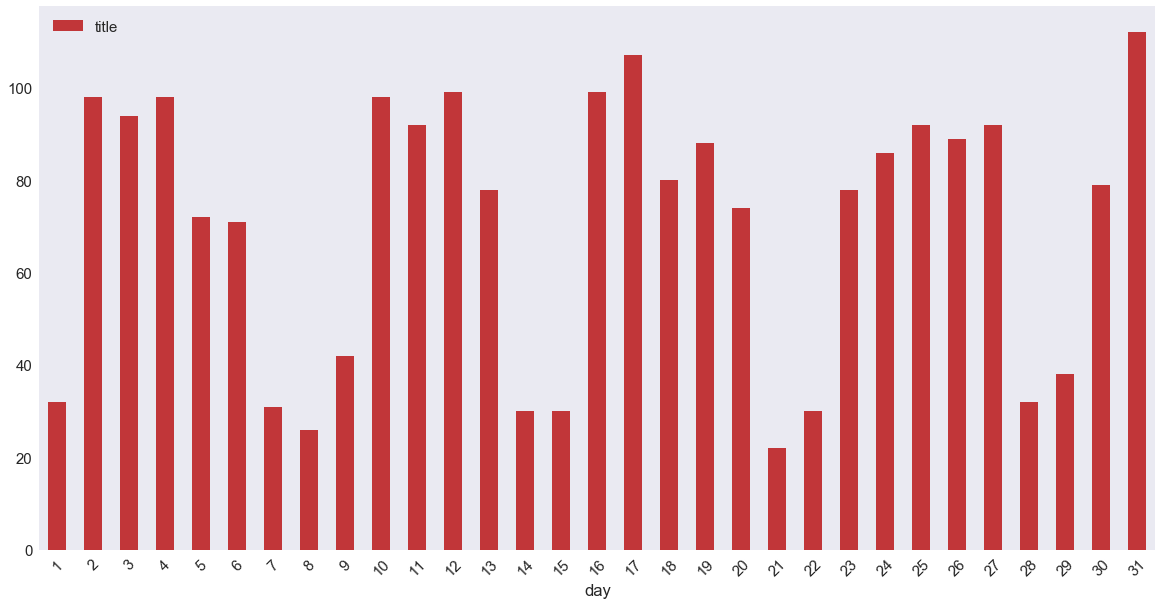

In [80]:
data[(data['year'] == 2015) & (data['month'] == 3)].groupby('day')[['title']].count().plot(kind = 'bar', rot = 45, figsize = [20,10])

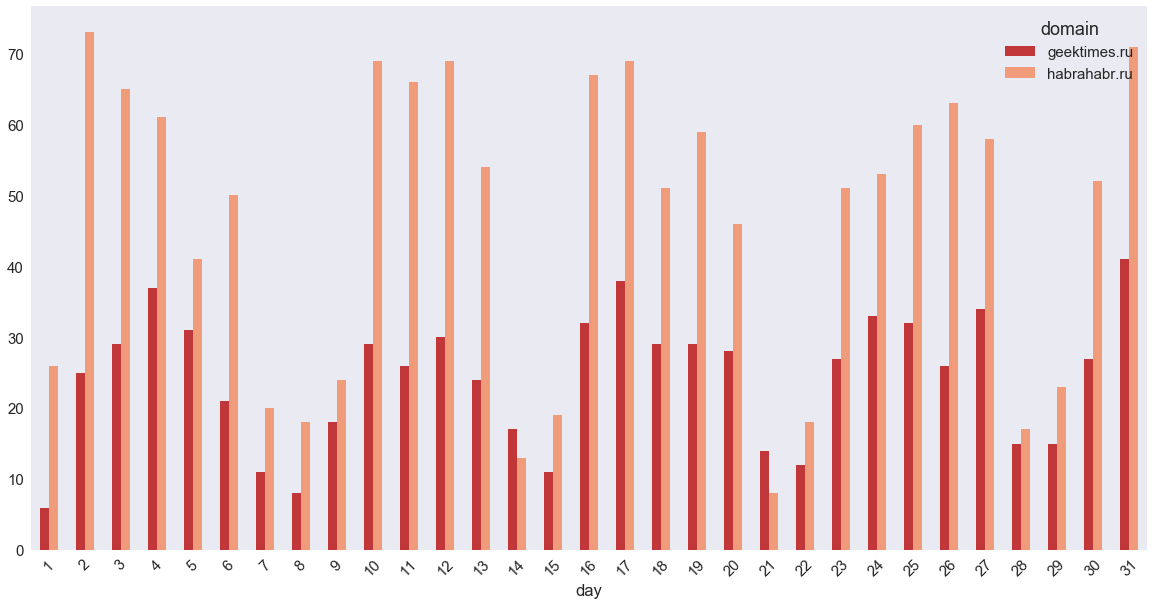

In [82]:
march_2015 = data[(data['year'] == 2015) & (data['month'] == 3)]
march_2015.pivot_table(index='day', values='title', aggfunc='count', columns='domain').plot(kind = 'bar', rot = 45, figsize = [20,10])

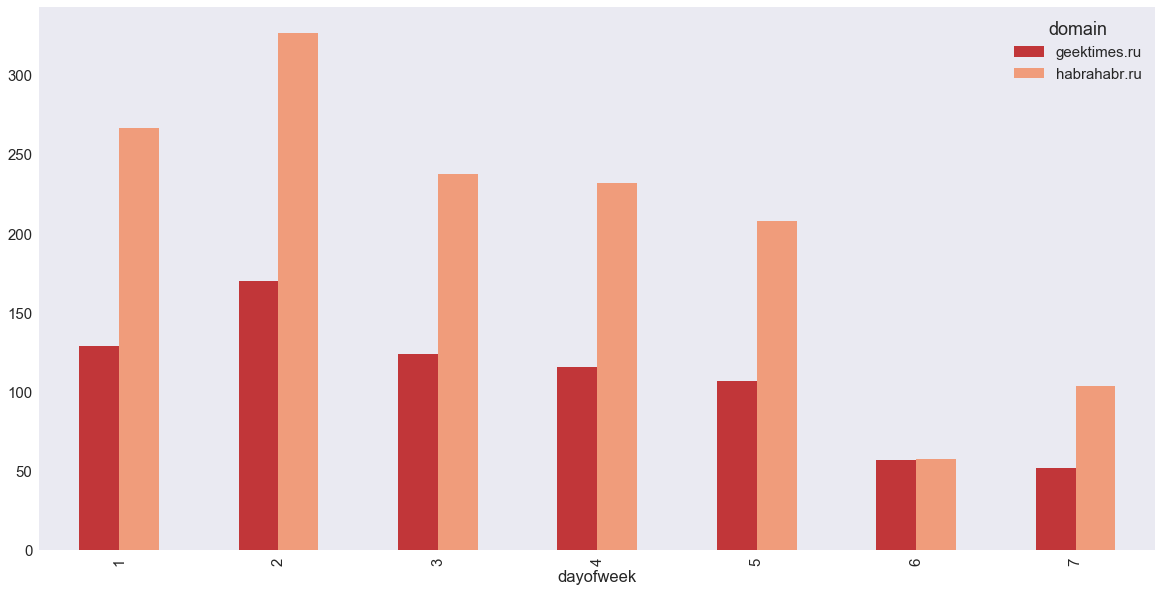

In [83]:
march_2015 = data[(data['year'] == 2015) & (data['month'] == 3)]
march_2015.pivot_table(index='dayofweek', values='title', aggfunc='count', columns='domain').plot(kind = 'bar', figsize = [20,10])

In [84]:
# По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей


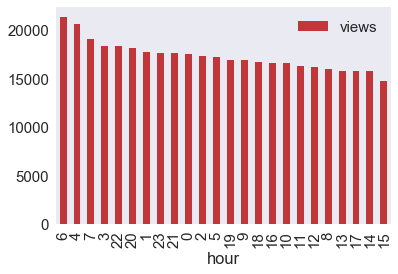

In [93]:
data.groupby('hour')[['views']].mean().sort_values('views', ascending=False).plot(kind = 'bar')

In [94]:
# Больше всего просмотров набирают статьи, опубликованные в 12 часов дня - нет

In [95]:
# Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - да

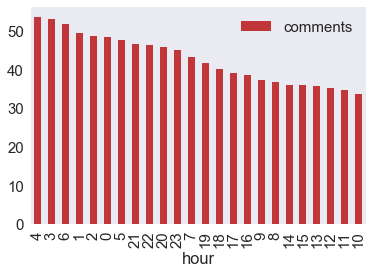

In [96]:
data.groupby('hour')[['comments']].mean().sort_values('comments', ascending = False).plot(kind = 'bar')

In [97]:
# У опубликованных в 10 утра постов больше всего комментариев - нет
# Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера - нет

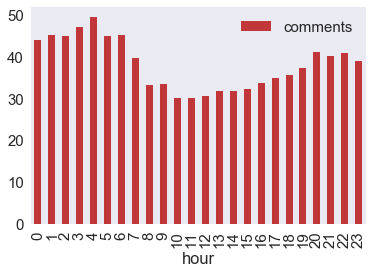

In [99]:
data[data.domain == 'habrahabr.ru'].groupby('hour')[['comments']].mean().plot(kind = 'bar')

In [100]:
#На хабре дневные статьи комментируют чаще, чем вечерние - нет

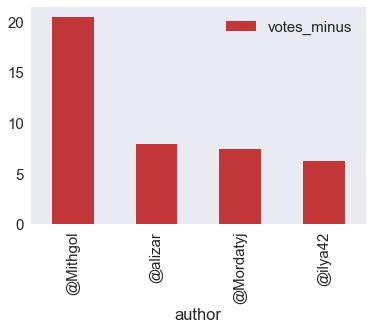

In [101]:
top = ['@Mordatyj', '@Mithgol', '@alizar', '@ilya42']
data[data.author.isin(top)].groupby('author')[['votes_minus']].mean().sort_values('votes_minus', ascending = False).plot(kind = 'bar')

In [102]:
# Минусуют чаще всего @Mithgol

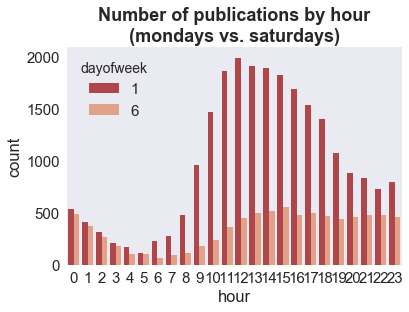

In [103]:
g = sns.countplot(x = 'hour', hue = 'dayofweek', data = data[data.dayofweek.isin([1, 6])]);
g.set_title("Number of publications by hour\n(mondays vs. saturdays)", fontweight = 'bold');

In [104]:
# Нет